# Implementation of the Fleury's Algorithm for finding and printing an Eulerian Cycle in a Graph

## 1. Euler Path
### Euler Path is a path that visits each edge of a graph exactly once. It may start and end at a different vertex.
### Theorem: An undirected graph has at least one Euler path if and only if it is connected and has two or zero vertices of odd degree.
### All vertices with non-zero degree are connected. We don’t care about vertices with zero degree because they don’t belong to Eulerian Cycle or Path (we only consider all edges).

## 2. Euler Circuit
###  Euler Circuit is a circuit that visits each edge of a graph exactly once. It starts and ends at the same vertex. 
### Theorem: An undirected graph has an Euler circuit if and only if it is connected and has zero vertices of odd degree.
### All vertices with non-zero degree are connected. We don’t care about vertices with zero degree because they don’t belong to Eulerian Cycle or Path (we only consider all edges).

# Fleury's Algorithm for finding and printing an Eulerian Cycle in a Graph 

### The basic principle of Fleury’s algorithm is very simple. In order to find the Euler Path or Euler Circuit, the bridge edge should be the last edge we want to cross. This is because the bridge is the only edge connecting the two components of a graph. If we crossed the bridge without visiting all edges in the first component then we cannot come back to the first component without re-visiting the bridge.

### Firstly, we are using the function isEulerian() to check wheather the graph consists an Eulerian Path, Circuit or non of them. 

## Steps for implementing Fleury's Algorithm for finding Eulerian Cycle in a graph:
### 1. Make sure the graph has either 0 or 2 odd vertices.
### 2. If there are 0 odd vertices, start anywhere. If there are 2 odd vertices, start at one of them.
### 3. We traverse all adjacent vertices of the starting point (let say vertex 'u'), if there is only one adjacent vertex, we immediately consider it. If there are more than one adjacent vertices, we consider an adjacent v only if edge u-v is not a bridge. We consider that a given edge is a bridge, so that we count the number of vertices reachable from 'u'.
### 4. We remove edge u-v and again count number of reachable vertices from u. If number of reachable vertices are reduced, then edge u-v is a bridge.
### 5. Once an edge is processed (included in Euler tour), we remove it from the graph. To remove the edge, we replace the vertex entry with -1 in adjacency list. 

### 6. We stop when we are run out of edges.

In [42]:

from collections import defaultdict
   

#Class for creating an undirected graph using adjacency list
class Graph:
   
    def __init__(self,vertices):
        self.V= vertices #No. of vertices
        self.graph = defaultdict(list) # default dictionary to store graph
        self.Time = 0
   
    # function to add an edge to graph
    def addEdge(self,u,v):
        self.graph[u].append(v)
        self.graph[v].append(u)
  
    # This function removes edge u-v from graph    
    def rmvEdge(self, u, v):
        for index, key in enumerate(self.graph[u]):
            if key == v:
                self.graph[u].pop(index)
        for index, key in enumerate(self.graph[v]):
            if key == u:
                self.graph[v].pop(index)
     #A function used by isConnected
    def DFSUtil(self,v,visited):
        # Mark the current node as visited 
        visited[v]= True
  
        #Recur for all the vertices adjacent to this vertex
        for i in self.graph[v]:
            if visited[i]==False:
                self.DFSUtil(i,visited)
   
    # A DFS based function to count reachable vertices from v
    def DFSCount(self, v, visited):
        count = 1
        visited[v] = True
        for i in self.graph[v]:
            if visited[i] == False:
                count = count + self.DFSCount(i, visited)         
        return count
    
    '''Method to check if all non-zero degree vertices are
    connected. It mainly does DFS traversal starting from 
    node with non-zero degree'''
    def isConnected(self):
   
        # Mark all the vertices as not visited
        visited =[False]*(self.V)
  
        #  Find a vertex with non-zero degree
        for i in range(self.V):
            if len(self.graph[i]) > 1:
                break
  
        # If there are no edges in the graph, return true
        if i == self.V-1:
            return True
  
        # Start DFS traversal from a vertex with non-zero degree
        self.DFSUtil(i,visited)
  
        # Check if all non-zero degree vertices are visited
        for i in range(self.V):
            if visited[i]==False and len(self.graph[i]) > 0:
                return False
          
        return True
  
    '''The function returns one of the following values
       0 --> If grpah is not Eulerian
       1 --> If graph has an Euler path (Semi-Eulerian)
       2 --> If graph has an Euler Circuit (Eulerian)  '''
    def isEulerian(self):
        # Check if all non-zero degree vertices are connected
        if self.isConnected() == False:
            return 0
        else:
            #Count vertices with odd degree
            odd = 0
            for i in range(self.V):
                if len(self.graph[i]) % 2 !=0:
                    odd +=1
  
            '''If odd count is 2, then semi-eulerian.
            If odd count is 0, then eulerian
            If count is more than 2, then graph is not Eulerian
            Note that odd count can never be 1 for undirected graph'''
            if odd == 0:
                return 2
            elif odd == 2:
                return 1
            elif odd > 2:
                return 0
            
    # The function to check if edge u-v can be considered as next edge in
    # Euler Tour
    def isValidNextEdge(self, u, v):
        # The edge u-v is valid in one of the following two cases:
   
          #  1) If v is the only adjacent vertex of u
        if len(self.graph[u]) == 1:
            return True
        else:
            '''
             2) If there are multiple adjacents, then u-v is not a bridge
                 Do following steps to check if u-v is a bridge
   
            2.a) count of vertices reachable from u'''    
            visited =[False]*(self.V)
            count1 = self.DFSCount(u, visited)
  
            '''2.b) Remove edge (u, v) and after removing the edge, count
                vertices reachable from u'''
            self.rmvEdge(u, v)
            visited =[False]*(self.V)
            count2 = self.DFSCount(u, visited)
  
            #2.c) Add the edge back to the graph
            self.addEdge(u,v)
  
            # 2.d) If count1 is greater, then edge (u, v) is a bridge
            return False if count1 > count2 else True
  
  
    # Print Euler tour starting from vertex u
    def printEulerUtil(self, u):
        #Recur for all the vertices adjacent to this vertex
        for v in self.graph[u]:
            #If edge u-v is not removed and it's a a valid next edge
            if self.isValidNextEdge(u, v):
                print("%d-%d " %(u,v)),
                self.rmvEdge(u, v)
                self.printEulerUtil(v)
  
  
      
    '''The main function that print Eulerian Trail. It first finds an odd
   degree vertex (if there is any) and then calls printEulerUtil()
   to print the path '''
    def printEulerTour(self):
        #Find a vertex with odd degree
        res = self.isEulerian()
        if res == 0:
            print ("The graph is not Eulerian")
        elif res == 1:
            print ("The graph has an Euler path")
        else:
            print("The graph has an Euler circuit and it's follows: ")
            u = 0
            for i in range(self.V):
                if len(self.graph[i]) %2 != 0 :
                    u = i
                    break
            # Print tour starting from odd vertex
            print ("\n")
            self.printEulerUtil(u)
 
  


### Example 1. for finding Eulerian Cycle in a graph using Fleury's algorithm

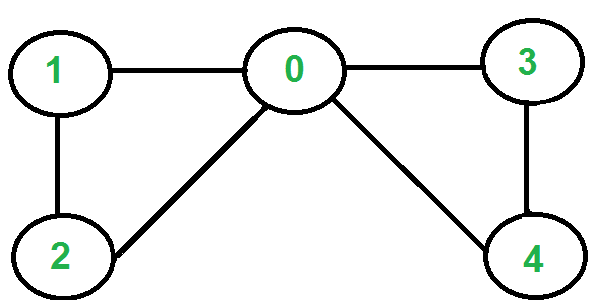

In [43]:
g4 = Graph(5)
g4.addEdge(0, 1)
g4.addEdge(0, 2)
g4.addEdge(1, 2)
g4.addEdge(0, 3)
g4.addEdge(0, 4)
g4.addEdge(3, 4)


g4.printEulerTour()

The graph has an Euler circuit and it's follows: 


0-1 
1-2 
2-0 
0-3 
3-4 
4-0 


### Example 2. for finding Eulerian Cycle in a graph using Fleury's algorithm

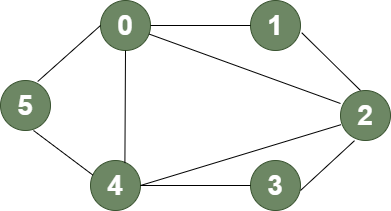

In [44]:
g5 = Graph(6)
g5.addEdge(0, 1)
g5.addEdge(0, 5)
g5.addEdge(0, 2)
g5.addEdge(0, 4)
g5.addEdge(1, 2)
g5.addEdge(2, 3)
g5.addEdge(2, 4)
g5.addEdge(3, 4)
g5.addEdge(4, 5)
g5.printEulerTour()


The graph has an Euler circuit and it's follows: 


0-1 
1-2 
2-0 
0-5 
5-4 
4-3 
3-2 
2-4 
4-0 


### Example 3. for finding Eulerian Cycle in a graph using Fleury's algorithm

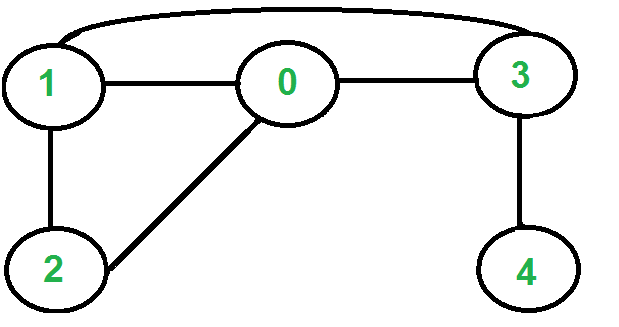

In [45]:

g6 = Graph(5)
g6.addEdge(0, 1)
g6.addEdge(0, 2)
g6.addEdge(0, 3)
g6.addEdge(1, 2)
g6.addEdge(1, 3)
g6.addEdge(3, 4)


g6.printEulerTour()

  

The graph is not Eulerian


### Example 4. for finding Eulerian Cycle in a graph using Fleury's algorithm

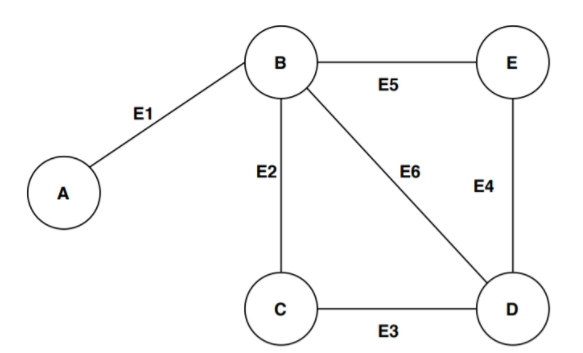

In [46]:

g7 = Graph(5)
g7.addEdge(0, 1)
g7.addEdge(1, 2)
g7.addEdge(1, 3)
g7.addEdge(1, 4)
g7.addEdge(3, 4)
g7.addEdge(3, 2)

g7.printEulerTour()

The graph has an Euler path
